# Binary Classification Model for Truck APS Failure Detection Using Python Take 2
### David Lowe
### August 20, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The APS Failure at Scania Trucks dataset is a classic binary classification situation where we are trying to predict one of the two possible outcomes.

INTRODUCTION: The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes. The dataset's positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.

This dataset has many cells with missing values, so it is not practical to simply delete the rows with missing cells. This iteration of the project will produce a set of results by imputing the blank cells with the mean value. We will compare the results from Take 1, where we imputed the blank cells with the value zero.

CONCLUSION: From the Take1 iteration, the baseline performance of the ten algorithms achieved an average accuracy of 98.8001%. The ensemble algorithms (Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting) all achieved the top accuracy scores after the first round of modeling. After a series of tuning trials, Random Forest turned in the top result using the training data. It achieved an average accuracy of 99.3983%. Using the optimized tuning parameter available, the Random Forest algorithm processed the validation dataset with an accuracy of 99.2187%, which was slightly below the accuracy of the training data.

From the current iteration (Take2), the baseline performance of the ten algorithms achieved an average accuracy of 98.8348%. The ensemble algorithms (Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting) all achieved the top accuracy scores after the first round of modeling. After a series of tuning trials, Random Forest turned in the top result using the training data. It achieved an average accuracy of 99.3967%. Using the optimized tuning parameter available, the Random Forest algorithm processed the validation dataset with an accuracy of 99.2187%, which was slightly below the accuracy of the training data.

For this iteration, imputing the missing cells with the mean value improved the average performance of all models slightly, but not so much for the Random Forest algorithm. For this project, the Random Forest ensemble algorithm yielded consistently top-notch training and validation results, which warrant the additional processing required by the algorithm.

Dataset Used: APS Failure at Scania Trucks Data Set 

Dataset ML Model: Binary classification with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

One potential source of performance benchmark: https://www.kaggle.com/uciml/aps-failure-at-scania-trucks-data-set/home

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [1]:
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'aps_failure_training_set.csv'
entireDataset = read_csv(inputFile, na_values="na")

inputFile = 'aps_failure_test_set.csv'
testDataset = read_csv(inputFile, na_values="na")

# First we need to convert the class column from string to binary values
entireDataset['targetVar'] = 1
entireDataset['targetVar'] = np.where(entireDataset['class']=='neg', 0, entireDataset['targetVar'])
entireDataset.drop('class', axis=1, inplace=True)
testDataset['targetVar'] = 1
testDataset['targetVar'] = np.where(testDataset['class']=='neg', 0, testDataset['targetVar'])
testDataset.drop('class', axis=1, inplace=True)

# Standardize the class column to the name of targetVar
entireDataset = entireDataset.rename(columns={'class': 'targetVar'})
testDataset = testDataset.rename(columns={'class': 'targetVar'})

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
set_option('display.width', 100)
print(entireDataset.head(20))

    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002   ag_003  \
0    76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0     0.0     0.0      0.0   
1    33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0     0.0      0.0   
2    41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0     0.0     0.0      0.0   
3       12     0.0  7.000000e+01    66.0     0.0    10.0     0.0     0.0     0.0    318.0   
4    60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0     0.0     0.0      0.0   
5    38312     NaN  2.130706e+09   218.0     0.0     0.0     0.0     0.0     0.0      0.0   
6       14     0.0  6.000000e+00     NaN     0.0     0.0     0.0     0.0     0.0      0.0   
7   102960     NaN  2.130706e+09   116.0     0.0     0.0     0.0     0.0     0.0      0.0   
8    78696     NaN  0.000000e+00     NaN     0.0     0.0     0.0     0.0     0.0      0.0   
9   153204     0.0  1.820000e+02     NaN     0.0     0.0     0.0     0

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(60000, 171)


In [6]:
print(testDataset.shape)

(16000, 171)


#### 2.a.iii) Types of the attributes.

In [7]:
print(entireDataset.dtypes)

aa_000         int64
ab_000       float64
ac_000       float64
ad_000       float64
ae_000       float64
af_000       float64
ag_000       float64
ag_001       float64
ag_002       float64
ag_003       float64
ag_004       float64
ag_005       float64
ag_006       float64
ag_007       float64
ag_008       float64
ag_009       float64
ah_000       float64
ai_000       float64
aj_000       float64
ak_000       float64
al_000       float64
am_0         float64
an_000       float64
ao_000       float64
ap_000       float64
aq_000       float64
ar_000       float64
as_000       float64
at_000       float64
au_000       float64
              ...   
dm_000       float64
dn_000       float64
do_000       float64
dp_000       float64
dq_000       float64
dr_000       float64
ds_000       float64
dt_000       float64
du_000       float64
dv_000       float64
dx_000       float64
dy_000       float64
dz_000       float64
ea_000       float64
eb_000       float64
ec_00        float64
ed_000       

#### 2.a.iv) Statistical summary of all attributes.

In [8]:
print(entireDataset.describe())

             aa_000        ab_000        ac_000        ad_000        ae_000        af_000  \
count  6.000000e+04  13671.000000  5.666500e+04  4.513900e+04  57500.000000  57500.000000   
mean   5.933650e+04      0.713189  3.560143e+08  1.906206e+05      6.819130     11.006817   
std    1.454301e+05      3.478962  7.948749e+08  4.040441e+07    161.543373    209.792592   
min    0.000000e+00      0.000000  0.000000e+00  0.000000e+00      0.000000      0.000000   
25%    8.340000e+02      0.000000  1.600000e+01  2.400000e+01      0.000000      0.000000   
50%    3.077600e+04      0.000000  1.520000e+02  1.260000e+02      0.000000      0.000000   
75%    4.866800e+04      0.000000  9.640000e+02  4.300000e+02      0.000000      0.000000   
max    2.746564e+06    204.000000  2.130707e+09  8.584298e+09  21050.000000  20070.000000   

             ag_000        ag_001        ag_002        ag_003      ...             ee_003  \
count  5.932900e+04  5.932900e+04  5.932900e+04  5.932900e+04      ..

#### 2.a.v) Summarize the levels of the class attribute.

In [9]:
print(entireDataset.groupby('targetVar').size())

targetVar
0    59000
1     1000
dtype: int64


#### 2.a.v) Count missing values.

In [10]:
print(entireDataset.isnull().sum())

aa_000           0
ab_000       46329
ac_000        3335
ad_000       14861
ae_000        2500
af_000        2500
ag_000         671
ag_001         671
ag_002         671
ag_003         671
ag_004         671
ag_005         671
ag_006         671
ag_007         671
ag_008         671
ag_009         671
ah_000         645
ai_000         629
aj_000         629
ak_000        4400
al_000         642
am_0           629
an_000         642
ao_000         589
ap_000         642
aq_000         589
ar_000        2723
as_000         629
at_000         629
au_000         629
             ...  
dm_000        4009
dn_000         691
do_000        2724
dp_000        2726
dq_000        2726
dr_000        2726
ds_000        2727
dt_000        2727
du_000        2726
dv_000        2726
dx_000        2723
dy_000        2724
dz_000        2723
ea_000        2723
eb_000        4007
ec_00        10239
ed_000        9553
ee_000         671
ee_001         671
ee_002         671
ee_003         671
ee_004      

In [11]:
print(testDataset.isnull().sum())

aa_000           0
ab_000       12363
ac_000         926
ad_000        3981
ae_000         690
af_000         690
ag_000         189
ag_001         189
ag_002         189
ag_003         189
ag_004         189
ag_005         189
ag_006         189
ag_007         189
ag_008         189
ag_009         189
ah_000         175
ai_000         163
aj_000         163
ak_000        1198
al_000         169
am_0           163
an_000         169
ao_000         162
ap_000         169
aq_000         162
ar_000         764
as_000         163
at_000         163
au_000         163
             ...  
dm_000        1094
dn_000         190
do_000         764
dp_000         764
dq_000         764
dr_000         764
ds_000         764
dt_000         764
du_000         764
dv_000         764
dx_000         764
dy_000         764
dz_000         762
ea_000         762
eb_000        1094
ec_00         2644
ed_000        2459
ee_000         192
ee_001         192
ee_002         192
ee_003         192
ee_004      

### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [12]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

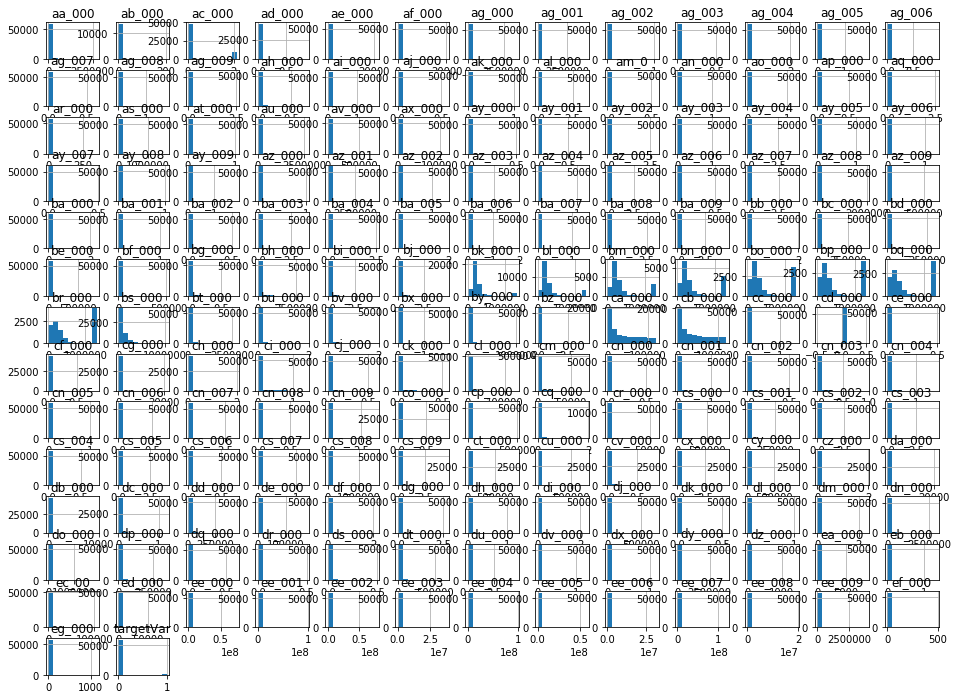

In [13]:
# Histograms for each attribute
entireDataset.hist()
pyplot.show()

In [14]:
# Density plot for each attribute
#entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
#pyplot.show()

In [15]:
# Box and Whisker plot for each attribute
#entireDataset.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
#pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

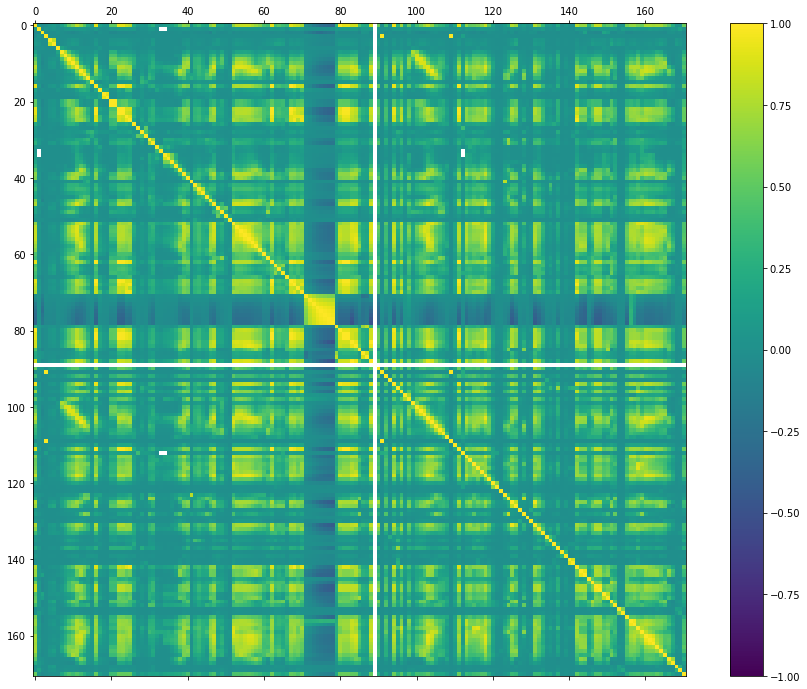

In [16]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [17]:
# Scatterplot matrix
#scatter_matrix(entireDataset)
#pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [18]:
entireColMean = entireDataset.mean()
entireColMean

aa_000       5.933650e+04
ab_000       7.131885e-01
ac_000       3.560143e+08
ad_000       1.906206e+05
ae_000       6.819130e+00
af_000       1.100682e+01
ag_000       2.216364e+02
ag_001       9.757223e+02
ag_002       8.606015e+03
ag_003       8.859128e+04
ag_004       4.370966e+05
ag_005       1.108374e+06
ag_006       1.657818e+06
ag_007       4.993098e+05
ag_008       3.556989e+04
ag_009       5.114753e+03
ah_000       1.809931e+06
ai_000       9.016965e+03
aj_000       1.143675e+03
ak_000       9.794900e+02
al_000       5.913048e+04
am_0         9.328133e+04
an_000       3.461037e+06
ao_000       3.002440e+06
ap_000       1.004160e+06
aq_000       4.424045e+05
ar_000       4.969185e-01
as_000       1.267365e+02
at_000       5.072046e+03
au_000       2.305804e+02
                 ...     
dm_000       7.923228e+03
dn_000       3.374545e+04
do_000       2.850785e+04
dp_000       6.958653e+03
dq_000       4.529375e+06
dr_000       2.037598e+05
ds_000       8.965500e+04
dt_000      

In [19]:
# Impute missing cells with mean value of the column
entireDataset.fillna(entireColMean, inplace=True)
print(entireDataset.head(20))

    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
0    76698  0.713189  2.130706e+09     280.000000     0.0     0.0     0.0     0.0     0.0   
1    33058  0.713189  0.000000e+00  190620.639314     0.0     0.0     0.0     0.0     0.0   
2    41040  0.713189  2.280000e+02     100.000000     0.0     0.0     0.0     0.0     0.0   
3       12  0.000000  7.000000e+01      66.000000     0.0    10.0     0.0     0.0     0.0   
4    60874  0.713189  1.368000e+03     458.000000     0.0     0.0     0.0     0.0     0.0   
5    38312  0.713189  2.130706e+09     218.000000     0.0     0.0     0.0     0.0     0.0   
6       14  0.000000  6.000000e+00  190620.639314     0.0     0.0     0.0     0.0     0.0   
7   102960  0.713189  2.130706e+09     116.000000     0.0     0.0     0.0     0.0     0.0   
8    78696  0.713189  0.000000e+00  190620.639314     0.0     0.0     0.0     0.0     0.0   
9   153204  0.000000  1.820000e+02  190620.639314     0.0     0.0     

In [20]:
testColMean = testDataset.mean()
testColMean

aa_000       6.799698e+04
ab_000       7.720649e-01
ac_000       3.580393e+08
ad_000       4.394988e+02
ae_000       6.428347e+00
af_000       1.019595e+01
ag_000       1.208585e+02
ag_001       2.064204e+03
ag_002       1.379236e+04
ag_003       1.126276e+05
ag_004       4.905419e+05
ag_005       1.175855e+06
ag_006       1.697994e+06
ag_007       5.063700e+05
ag_008       3.592157e+04
ag_009       5.784848e+03
ah_000       1.917730e+06
ai_000       1.177257e+04
aj_000       1.255392e+03
ak_000       9.293197e+02
al_000       7.088737e+04
am_0         1.121029e+05
an_000       3.660705e+06
ao_000       3.178963e+06
ap_000       1.076361e+06
aq_000       4.746624e+05
ar_000       4.776844e-01
as_000       6.994376e+02
at_000       5.664122e+03
au_000       5.599370e+02
                 ...     
dm_000       7.534451e+03
dn_000       3.613328e+04
do_000       2.994278e+04
dp_000       7.296625e+03
dq_000       3.700989e+06
dr_000       2.007056e+05
ds_000       9.342197e+04
dt_000      

In [21]:
# Impute missing cells with the mean value of the column
testDataset.fillna(testColMean, inplace=True)
print(testDataset.head(20))

    aa_000    ab_000        ac_000       ad_000    ae_000    af_000      ag_000       ag_001  \
0       60  0.000000  2.000000e+01    12.000000  0.000000   0.00000    0.000000     0.000000   
1       82  0.000000  6.800000e+01    40.000000  0.000000   0.00000    0.000000     0.000000   
2    66002  2.000000  2.120000e+02   112.000000  0.000000   0.00000    0.000000     0.000000   
3    59816  0.772065  1.010000e+03   936.000000  0.000000   0.00000    0.000000     0.000000   
4     1814  0.772065  1.560000e+02   140.000000  0.000000   0.00000    0.000000     0.000000   
5      174  0.772065  2.600000e+01    24.000000  0.000000   0.00000  120.858516  2064.203656   
6    40202  0.772065  6.400000e+02   606.000000  0.000000   0.00000    0.000000     0.000000   
7   120278  0.772065  2.130706e+09   256.000000  0.000000   0.00000    0.000000     0.000000   
8    14592  0.000000  2.130706e+09   162.000000  0.000000   0.00000    0.000000     0.000000   
9    28338  0.772065  2.130706e+09   238

### 3.b) Feature Selection

In [22]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [23]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [24]:
seedNum = 777
totCol = len(entireDataset.columns)
array = entireDataset.values
X_train = array[:,0:totCol-1]
Y_train = array[:,totCol-1]
totCol = len(testDataset.columns)
array = testDataset.values
X_validation = array[:,0:totCol-1]
Y_validation = array[:,totCol-1]
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_train.shape: (60000, 170) Y_train.shape: (60000,)
X_validation.shape: (16000, 170) Y_validation.shape: (16000,)
Total time for data handling and visualization: 0:00:26.810231


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Logistic Regression

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [25]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [26]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [27]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LR: 0.987617 (0.004599)
Model training time: 0:03:35.060260
CART: 0.990750 (0.001618)
Model training time: 0:04:19.764312
NB: 0.967650 (0.002282)
Model training time: 0:00:05.554545
KNN: 0.987133 (0.001038)
Model training time: 0:05:59.515029
BT: 0.993233 (0.000821)
Model training time: 0:16:31.701165
RF: 0.992817 (0.001226)
Model training time: 0:01:27.995940
ET: 0.992450 (0.001291)
Model training time: 0:00:44.318623
AB: 0.991033 (0.000698)
Model training time: 0:07:22.060988
GBM: 0.992450 (0.000857)
Model training time: 0:18:28.678916
Average metrics (accuracy) from all models: 0.9883481481481482


### 4.b) Spot-checking baseline algorithms

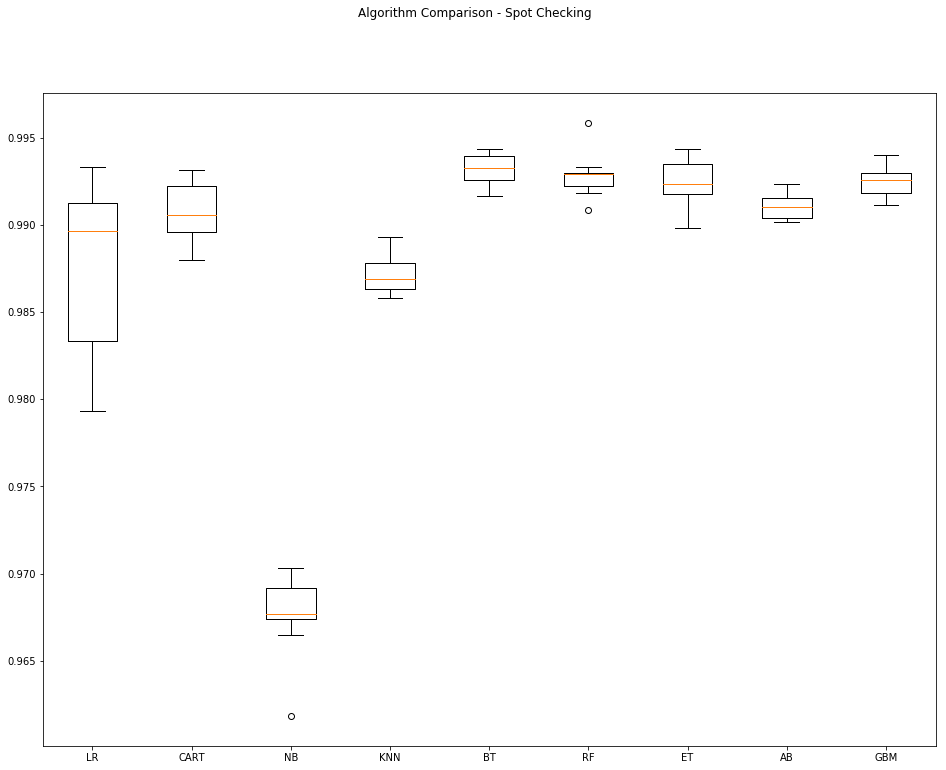

In [28]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [29]:
# Set up the comparison array
results = []
names = []

In [30]:
# Tuning algorithm #1 - Bagged CART
startTimeModule = datetime.now()
paramGrid1 = dict(n_estimators=np.array([75,100,125,150,175]))
model1 = BaggingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('BT')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.993933 using {'n_estimators': 100}
0.993900 (0.000824) with: {'n_estimators': 75}
0.993933 (0.000989) with: {'n_estimators': 100}
0.993917 (0.000898) with: {'n_estimators': 125}
0.993850 (0.000851) with: {'n_estimators': 150}
0.993750 (0.000797) with: {'n_estimators': 175}
Model training time: 18:42:13.480522


In [31]:
# Tuning algorithm #2 - Random Forest
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=np.array([200,250,300,350,400]))
model2 = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.993967 using {'n_estimators': 300}
0.993950 (0.000775) with: {'n_estimators': 200}
0.993917 (0.000720) with: {'n_estimators': 250}
0.993967 (0.000674) with: {'n_estimators': 300}
0.993917 (0.000731) with: {'n_estimators': 350}
0.993917 (0.000754) with: {'n_estimators': 400}
Model training time: 3:55:37.056621


In [32]:
# Tuning algorithm #3 - Extra Trees
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([50,100,150,200,250]))
model3 = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.993833 using {'n_estimators': 150}
0.993467 (0.000829) with: {'n_estimators': 50}
0.993750 (0.000883) with: {'n_estimators': 100}
0.993833 (0.000767) with: {'n_estimators': 150}
0.993783 (0.000796) with: {'n_estimators': 200}
0.993817 (0.000851) with: {'n_estimators': 250}
Model training time: 1:00:45.625628


In [33]:
# Tuning algorithm #4 - AdaBoost
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([500,600,700,800,900]))
model4 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)
grid_result4 = grid4.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.993683 using {'n_estimators': 900}
0.993067 (0.000680) with: {'n_estimators': 500}
0.993300 (0.000802) with: {'n_estimators': 600}
0.993450 (0.000817) with: {'n_estimators': 700}
0.993567 (0.000716) with: {'n_estimators': 800}
0.993683 (0.000769) with: {'n_estimators': 900}
Model training time: 9:12:49.250311


In [34]:
# Tuning algorithm #5 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([400,500,600,700,800]))
model5 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold)
grid_result5 = grid5.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.993733 using {'n_estimators': 600}
0.993533 (0.000557) with: {'n_estimators': 400}
0.993667 (0.000532) with: {'n_estimators': 500}
0.993733 (0.000517) with: {'n_estimators': 600}
0.993617 (0.000658) with: {'n_estimators': 700}
0.993550 (0.000687) with: {'n_estimators': 800}
Model training time: 10:09:03.203455


### 5.b) Compare Algorithms After Tuning

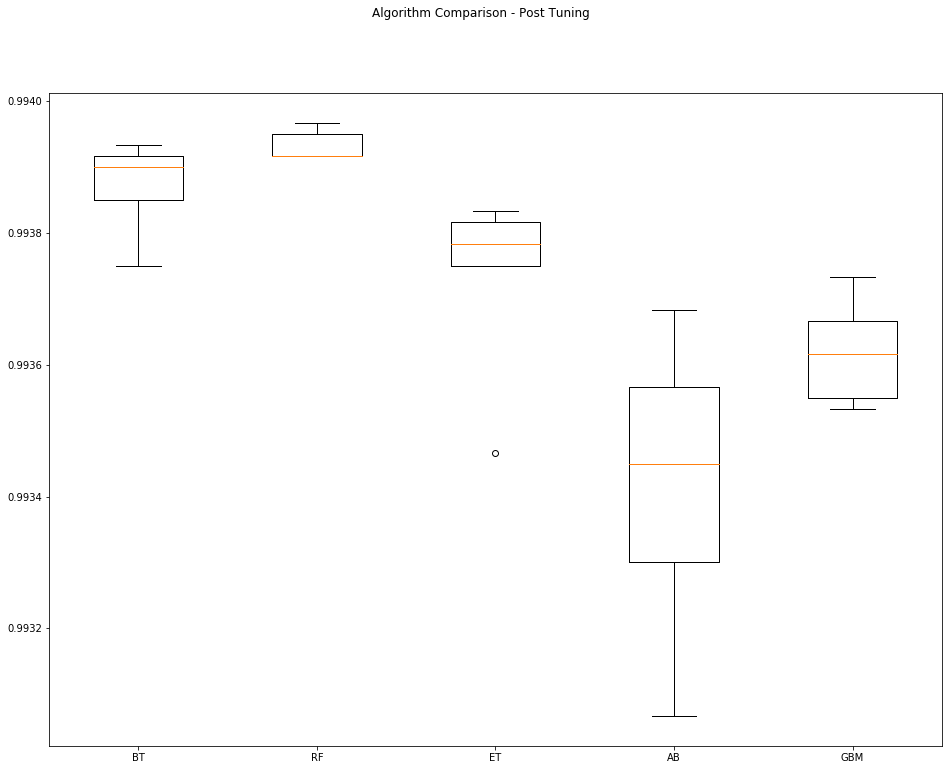

In [35]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [36]:
model = RandomForestClassifier(n_estimators=300, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9921875
[[15606    19]
 [  106   269]]
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     15625
        1.0       0.93      0.72      0.81       375

avg / total       0.99      0.99      0.99     16000



### 6.b) Create standalone model on entire training dataset

In [37]:
startTimeModule = datetime.now()
finalModel = RandomForestClassifier(n_estimators=300, random_state=seedNum)
finalModel.fit(X_train, Y_train)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:03:41.072739


### 6.c) Save model for later use

In [38]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 1 day, 20:06:57.222924
